<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Import libraries</b></div>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from Data_Cleaning import DataCleaning
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [23]:
obj=DataCleaning()
df_eda=obj.Cleaning()

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Data Preview </b>

In [24]:
df_eda.head()

,Airline,Source,Destination,Route,Price,Stops,Duration_hr,Arrival_Time_hrs,Dep_Time_hrs,Day,Month,Week
0,IndiGo,Banglore,Delhi,BLR → DEL,3897,0,2.833333,1,22,24,March,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7662,2,7.416667,13,5,1,May,Wednesday
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,13882,2,19.000000,4,9,9,June,Sunday
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,6218,1,5.416667,23,18,12,May,Sunday
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,13302,1,4.750000,21,16,1,March,Friday


<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Basic Insights About Data</b></div>

In [25]:
df_eda.shape

(10683, 12)

### <span style='color:#254E58'>💬 Insight </span>

- There are 10683 rows and 15 columns.


In [26]:
df_eda.describe(include='object').T

,count,unique,top,freq
Airline,10683,9,Jet Airways,3855
Source,10683,5,Delhi,4537
Destination,10683,5,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Month,10683,4,May,3466
Week,10683,7,Wednesday,2079


### <span style='color:#254E58'>💬 Insight </span>

- Mostly people choose `Jet Airways` over other airlines. This maybe due to lesser fare charge or better customer relationship.
- majority of individuals opt for travel from Delhi to Cochin with a layover in Mumbai.

In [27]:
df_eda.describe(exclude='object').T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.000000,5277.000000,8372.000000,12373.0,79512.000000
Stops,10683.0,0.824207,0.675199,0.000000,0.000000,1.000000,1.0,4.000000
Duration_hr,10683.0,10.718221,8.464367,0.083333,2.833333,8.666667,15.5,47.666667
Arrival_Time_hrs,10683.0,13.348778,6.859125,0.000000,8.000000,14.000000,19.0,23.000000
Dep_Time_hrs,10683.0,12.490686,5.748650,0.000000,8.000000,11.000000,18.0,23.000000
Day,10683.0,13.508378,8.479277,1.000000,6.000000,12.000000,21.0,27.000000


### <span style='color:#254E58'>💬 Insight </span>

- Dataset shows data about airline in the year `2019`.
- Min air fare was `1759` and max was `79512`

In [28]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Route             10682 non-null  object 
 4   Price             10683 non-null  int64  
 5   Stops             10683 non-null  int64  
 6   Duration_hr       10683 non-null  float64
 7   Arrival_Time_hrs  10683 non-null  int64  
 8   Dep_Time_hrs      10683 non-null  int64  
 9   Day               10683 non-null  int32  
 10  Month             10683 non-null  object 
 11  Week              10683 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 959.9+ KB


### <span style='color:#254E58'>💬 Insight </span>

- there is a single null value in `Route` there are no other null values.
- Categorical columns: 'Airline', 'Source', 'Destination', 'Route','Month', 'Week'
- Numerical columns: 'Price', 'Stops', 'Duration_hr', 'Arrival_Time_hrs',
       'Arrival_Time_mins', 'Dep_Time_hrs', 'Dep_Time_mins', 'Day'


In [29]:
df_eda.nunique()

Airline                9
Source                 5
Destination            5
Route                128
Price               1870
Stops                  5
Duration_hr          368
Arrival_Time_hrs      24
Dep_Time_hrs          24
Day                   10
Month                  4
Week                   7
dtype: int64

<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Identifying Missing Values</b></div>

In [30]:
df_eda.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Price               0
Stops               0
Duration_hr         0
Arrival_Time_hrs    0
Dep_Time_hrs        0
Day                 0
Month               0
Week                0
dtype: int64

### <span style='color:#254E58'>💬 Insight </span>

- there is a single null value in `Route` there are no other null values.


<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Univariate analysis</b></div>

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Columns in dataset </b>

In [31]:
df_eda.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Price', 'Stops',
       'Duration_hr', 'Arrival_Time_hrs', 'Dep_Time_hrs', 'Day', 'Month',
       'Week'],
      dtype='object')

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analysis Based on Airline </b>

In [32]:
df_eda.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [33]:
df_eda.Airline.value_counts()

Airline
Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: count, dtype: int64

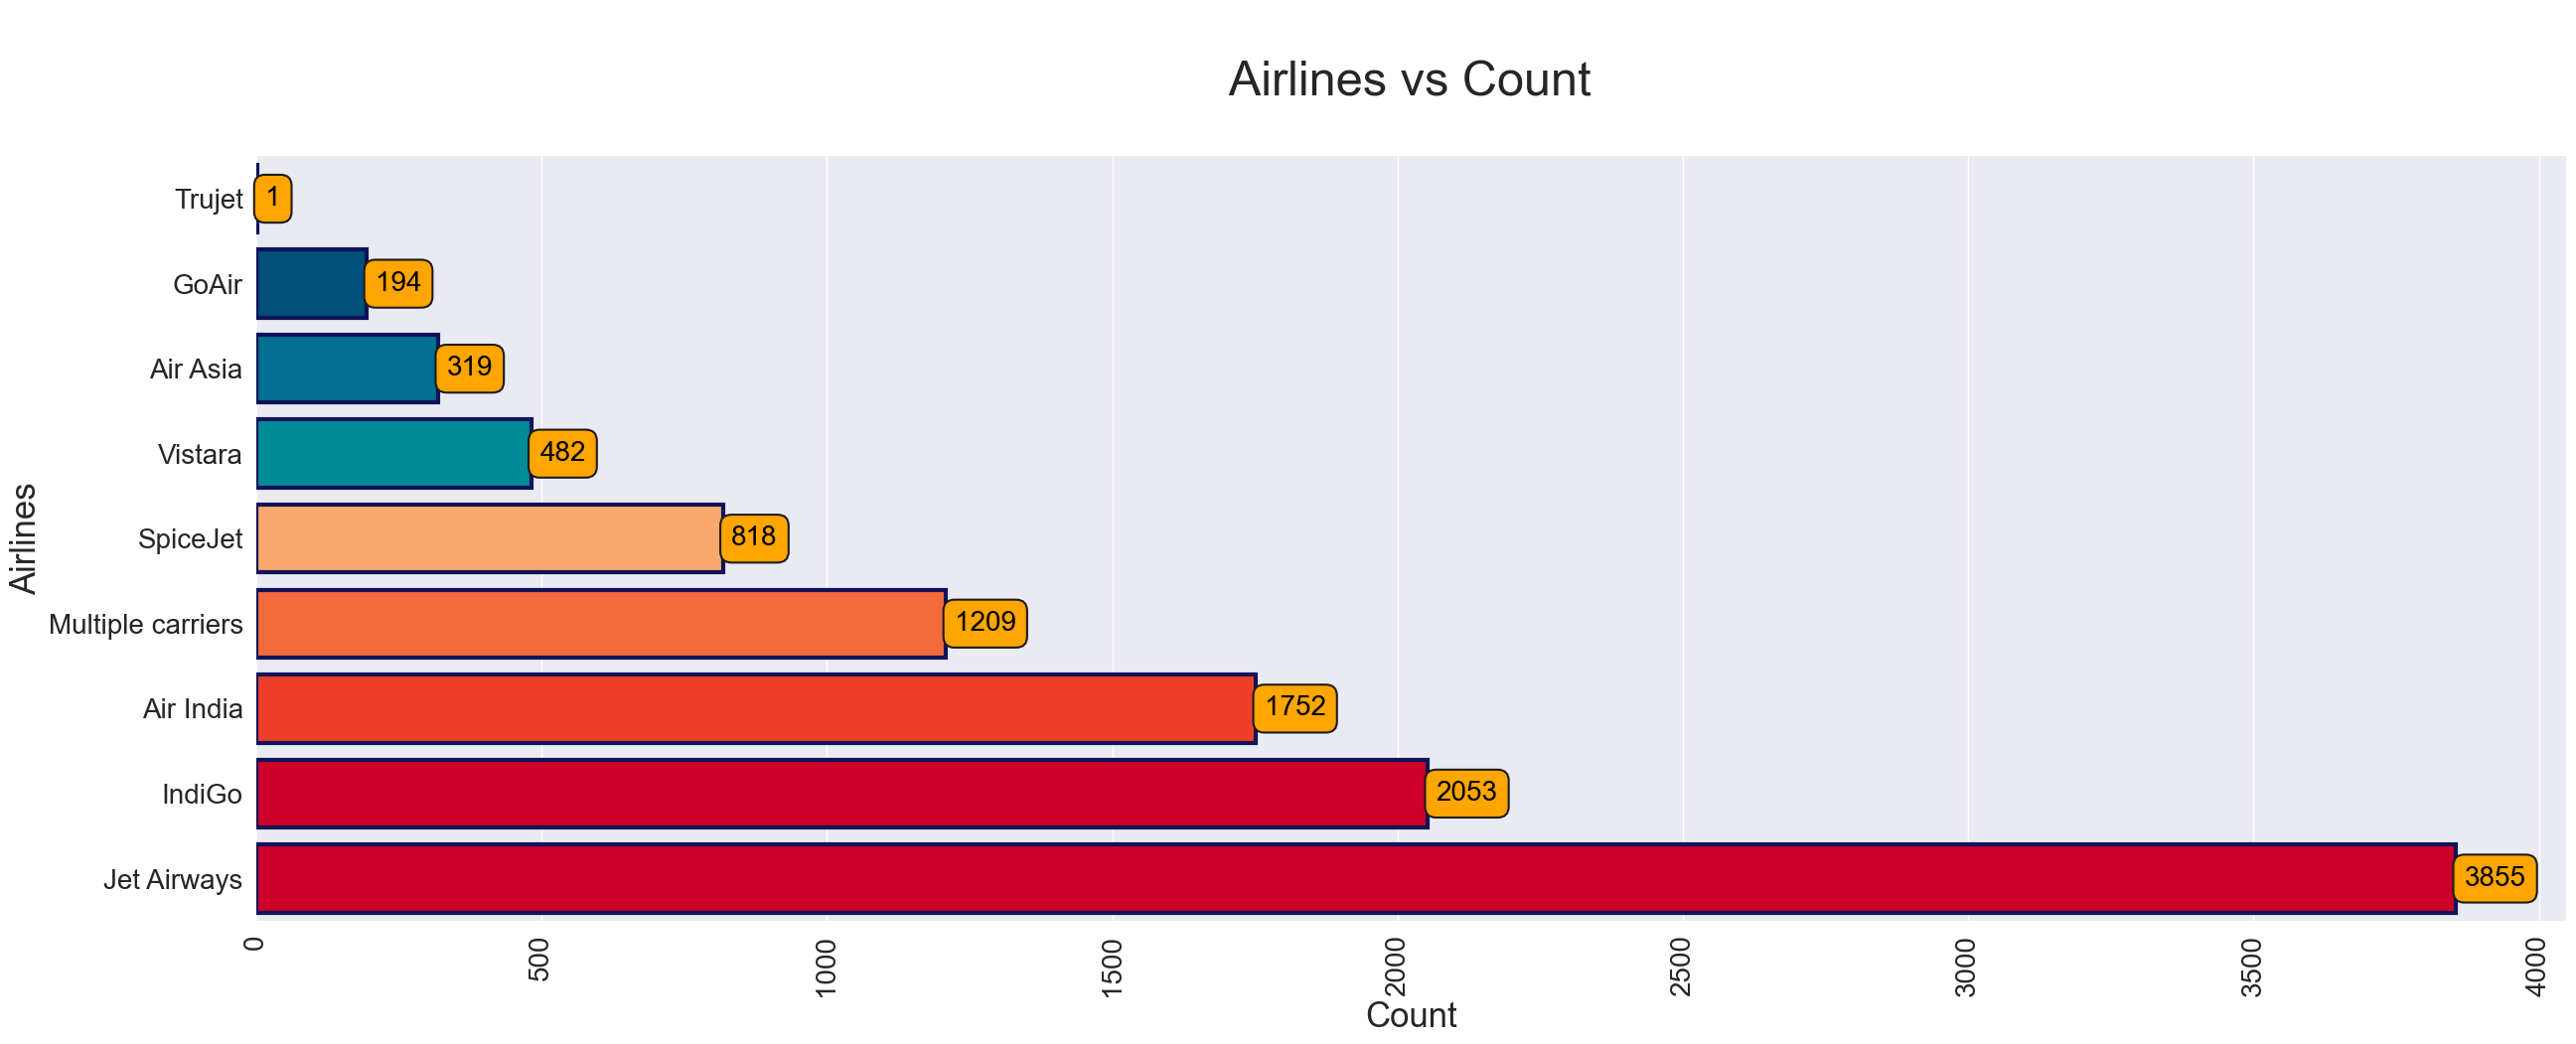

In [34]:
plt.subplots(figsize=(30, 10))
airlines=df_eda.groupby('Airline').Airline.count().sort_values()

palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028","#CC0029"]
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
p=sns.barplot(x=airlines.values,y=airlines.index,palette=palette,saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\n Airlines vs Count \n",fontsize=35)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90,fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=20)

p.set_xlabel('Count',fontsize=25)
p.set_ylabel('Airlines',fontsize=25)

for c in p.containers:
    p.bar_label(c,padding=6,size=20,color="black",rotation=0,bbox={'boxstyle':'round',"facecolor": "orange", "edgecolor": "#1c1c1c","linewidth" : 1.5,"alpha": 1,"pad": 0.4})
sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:#254E58'>💬 Insight </span>

- There are 9 airlines.
- Mostly people choose `Jet Airways` followed by `IndiGo`
- Least used airline is `Trujet` only one customer

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analysis based on source</b>

In [35]:
df_eda.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

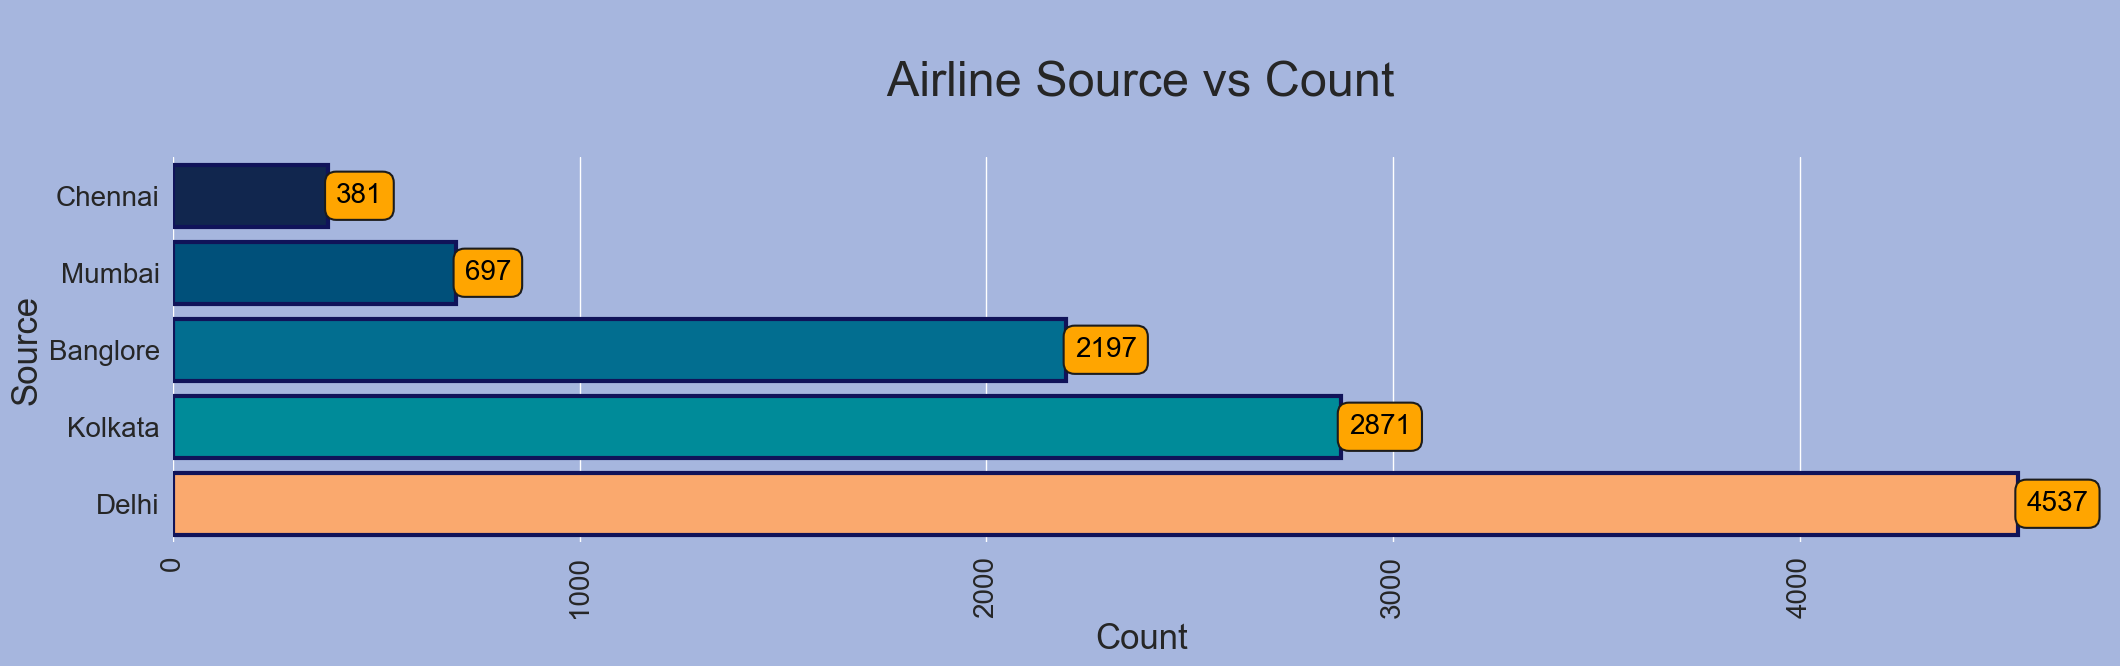

In [36]:
plt.subplots(figsize=(25, 5))
source=df_eda.groupby('Source').Source.count().sort_values()

palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028","#CC0029"]
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
p=sns.barplot(x=source.values,y=source.index,palette=palette,saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\n Airline Source vs Count \n",fontsize=35)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90,fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=20)
p.set_xlabel('Count',fontsize=25)
p.set_ylabel('Source',fontsize=25)

for c in p.containers:
    p.bar_label(c,padding=6,size=20,color="black",rotation=0,bbox={'boxstyle':'round',"facecolor": "orange", "edgecolor": "#1c1c1c","linewidth" : 1.5,"alpha": 1,"pad": 0.4})
sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:#254E58'>💬 Insight </span>

- Most customer are from `Delhi` followed by `Kolkata`

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analysis based on Destination</b>

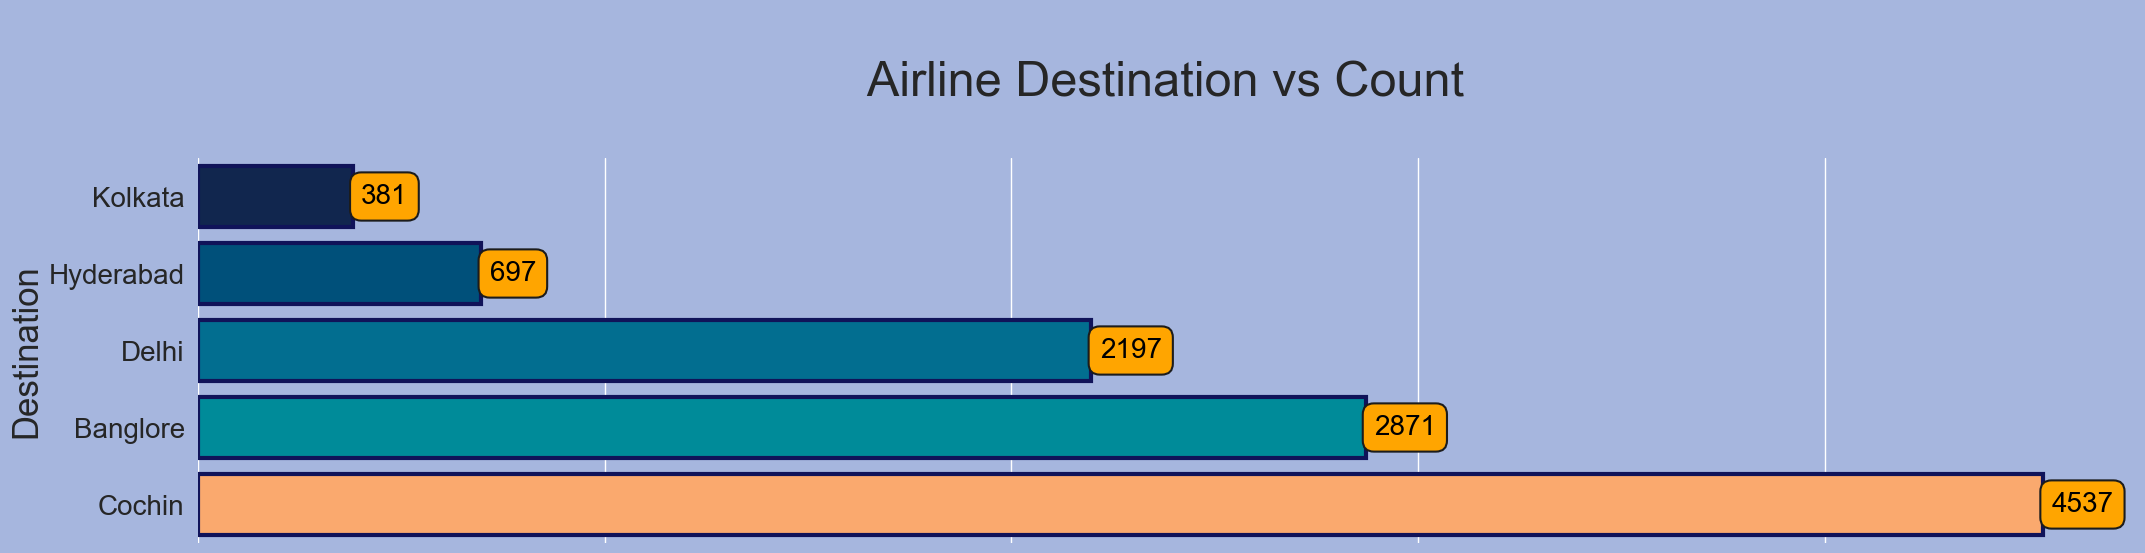

In [58]:
plt.subplots(figsize=(25, 5))
destination=df_eda.groupby('Destination').Destination.count().sort_values()

palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028","#CC0029"]
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
p=sns.barplot(x=destination.values,y=destination.index,palette=palette,saturation=1, edgecolor = "#101359", linewidth = 3)
p.axes.set_title("\n Airline Destination vs Count \n",fontsize=35)
#p.axes.set_xticklabels(p.get_xticklabels(),rotation = 90,fontsize=20)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=20)
plt.gca().set_xticklabels([])
p.set_ylabel('Destination',fontsize=25)

for c in p.containers:
    p.bar_label(c,padding=6,size=20,color="black",rotation=0,bbox={'boxstyle':'round',"facecolor": "orange", "edgecolor": "#1c1c1c","linewidth" : 1.5,"alpha": 1,"pad": 0.4})
sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:#254E58'>💬 Insight </span>

- Most customer are from `Cochin` followed by `Banglore`
- from source and destination column ist identified all flights are domestic.

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analysis based on No of Layover</b>

In [38]:
stop=df_eda.groupby('Stops').Stops.count().sort_values(ascending=True)
colors = ["gold", "mediumturquoise", "darkorange", "lightgreen",'lightorange']
fig=px.pie(
    values=stop.values,
    names=stop.index,
    title= 'Analysis Based On No Of Connection Flight',
    width=850,height=600,
    color_discrete_sequence=px.colors.sequential.Sunsetdark,
    template='plotly_dark'
    
       )

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='#100000', width=2)))

fig.show()



### <span style='color:#254E58'>💬 Insight </span>

- flights which have very less or no layover covers around `85%`.
- Customer mostly prefers least layover.

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Analising outliers on numerical columns</b>


In [39]:
numerical_cols=df_eda.select_dtypes(exclude='object').columns.to_list()

In [40]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           10683 non-null  object 
 1   Source            10683 non-null  object 
 2   Destination       10683 non-null  object 
 3   Route             10682 non-null  object 
 4   Price             10683 non-null  int64  
 5   Stops             10683 non-null  int64  
 6   Duration_hr       10683 non-null  float64
 7   Arrival_Time_hrs  10683 non-null  int64  
 8   Dep_Time_hrs      10683 non-null  int64  
 9   Day               10683 non-null  int32  
 10  Month             10683 non-null  object 
 11  Week              10683 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(6)
memory usage: 959.9+ KB


In [41]:
numerical_cols.remove('Price')

In [42]:
fig=px.box(
    df_eda[numerical_cols],
    template="plotly_dark",
    width=1200, height=700,
    )
fig.show()

### <span style='color:#254E58'>💬 Insight </span>

- there are outliers in `Stops` and `Duration_hr`

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Flights Count Based On Month</b>


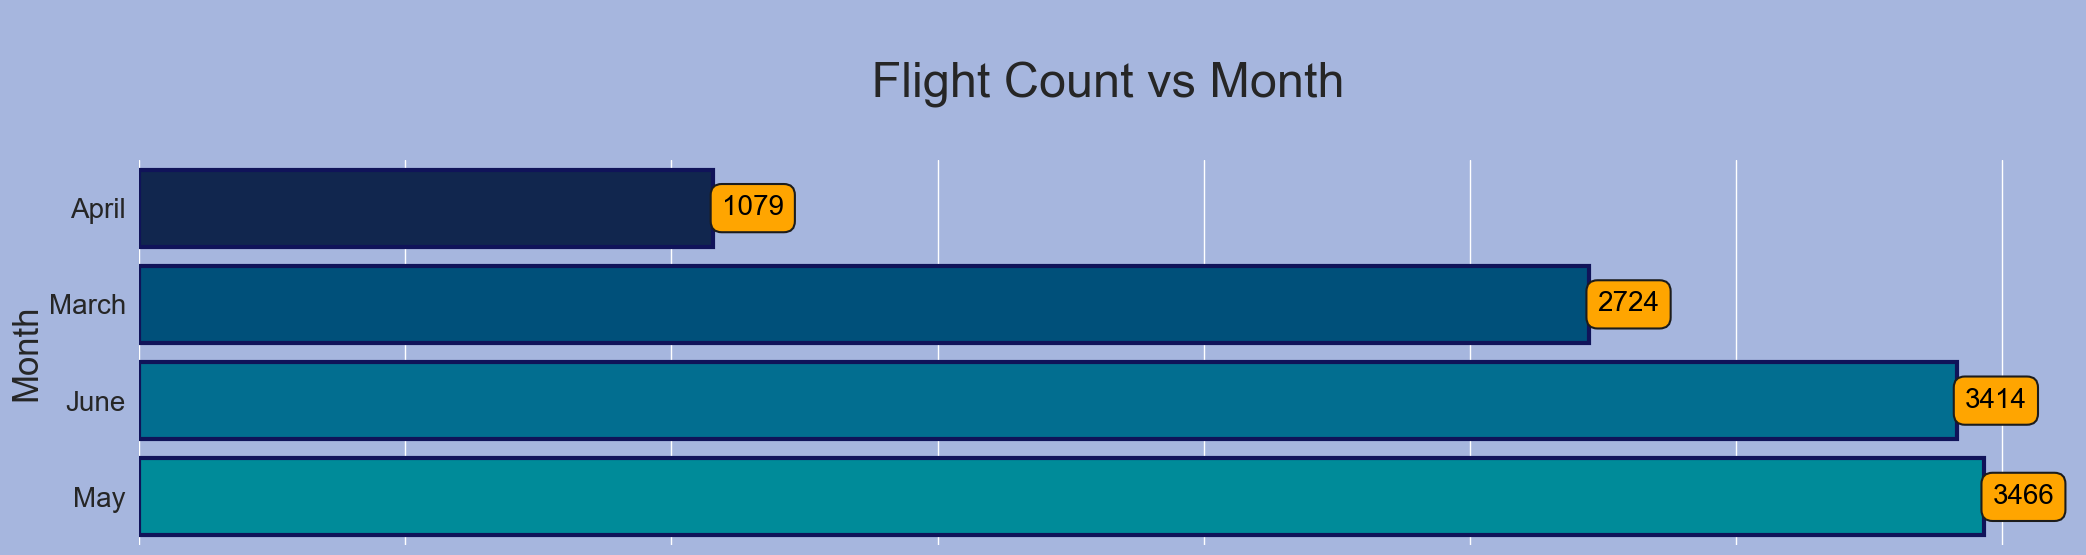

In [59]:
plt.subplots(figsize=(25, 5))
month=df_eda.Month.value_counts().sort_values(ascending=True)

palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028","#CC0029"]
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
p=sns.barplot(x=month.values,y=month.index,palette=palette,saturation=1, edgecolor = "#101359", linewidth = 3,orient = 'h')
p.axes.set_title("\n Flight Count vs Month \n",fontsize=35)
plt.gca().set_xticklabels([])
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=20)
p.set_ylabel('Month',fontsize=25)

for c in p.containers:
    p.bar_label(c,padding=6,size=20,color="black",rotation=0,bbox={'boxstyle':'round',"facecolor": "orange", "edgecolor": "#1c1c1c","linewidth" : 1.5,"alpha": 1,"pad": 0.4})
sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:#254E58'>💬 Insight </span>

- Data is avaliable only for 4 months `March`,`April`,`May`,`June`.
- In which `May` is the top followed by `June`.

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Flights Count Based On Month</b>

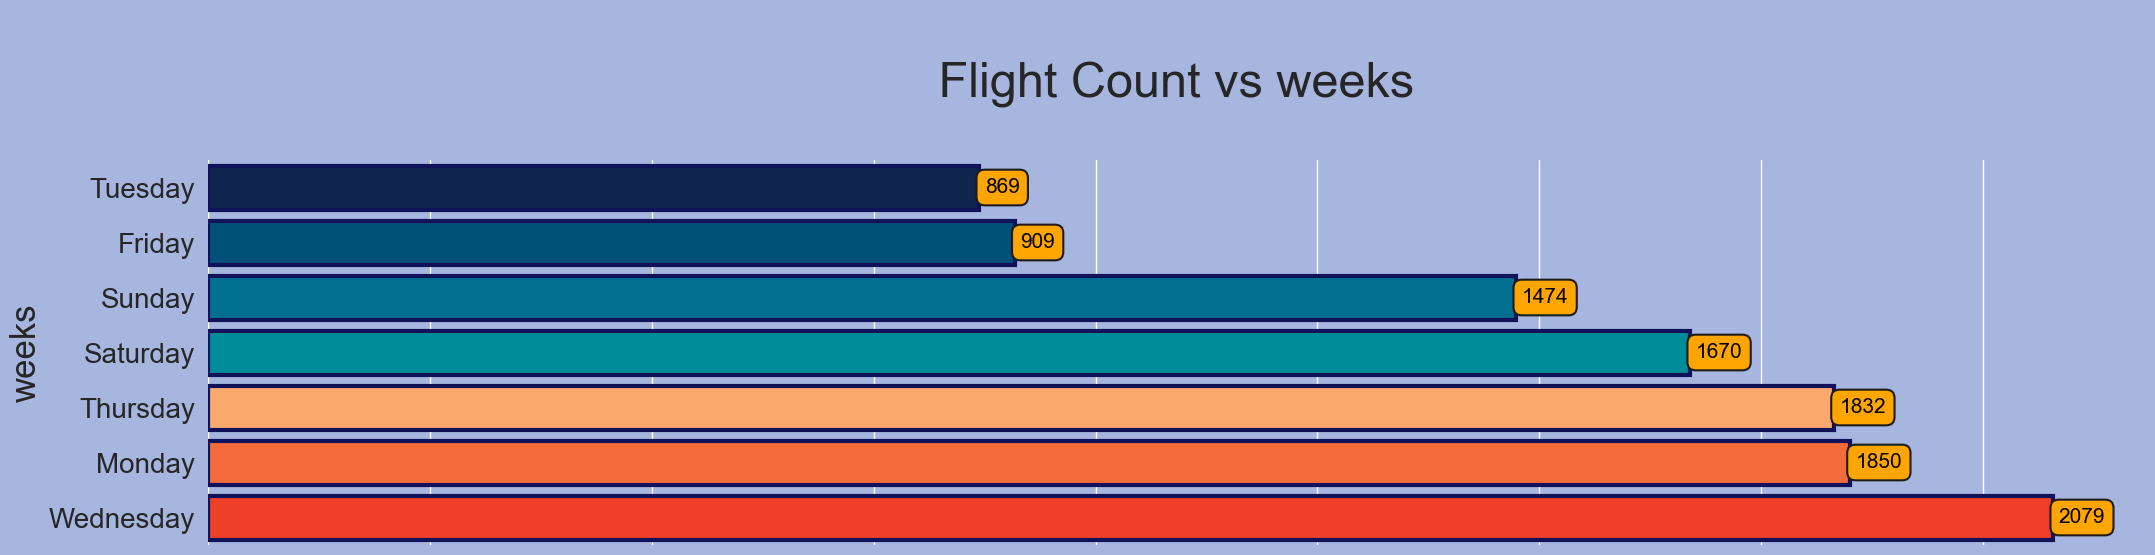

In [60]:
plt.subplots(figsize=(25, 5))
weeks=df_eda.Week.value_counts().sort_values(ascending=True)

palette = ["#11264e","#00507A","#026e90","#008b99","#faa96e","#f36b3b","#ef3f28","#CC0028","#CC0029"]
sns.set(rc={"axes.facecolor":"#A6B6DE","figure.facecolor":"#A6B6DE"})
p=sns.barplot(x=weeks.values,y=weeks.index,palette=palette,saturation=1, edgecolor = "#101359", linewidth = 3,orient = 'h')
p.axes.set_title("\n Flight Count vs weeks \n",fontsize=35)
p.axes.set_yticklabels(p.get_yticklabels(),rotation = 0,fontsize=20)
plt.gca().set_xticklabels([])
p.set_ylabel('weeks',fontsize=25)

for c in p.containers:
    p.bar_label(c,padding=4,size=15,color="black",rotation=0,bbox={'boxstyle':'round',"facecolor": "orange", "edgecolor": "#1c1c1c","linewidth" : 1.5,"alpha": 1,"pad": 0.4})
sns.despine(left=True, bottom=True)
plt.show()

### <span style='color:#254E58'>💬 Insight </span>

- Mostly people prefer `Wednessday` to travel.

<div style="padding:20px;color:white;margin:0;font-size:35px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background: linear-gradient(to right, #ff7e5f, #feb47b);overflow:hidden"><b>Bivariate Analysis</b></div>

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Price vs Airlines</b>

In [45]:
mean=pd.DataFrame(df_eda.groupby("Airline")["Price"].mean().round(0)).reset_index()

fig = px.bar(y=mean["Price"], 
             x=mean["Airline"], 
             color = mean["Airline"],
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=mean["Price"],
             title= 'Airline and average Price',
             template= 'plotly_dark',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Airline",
    yaxis_title="Price",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### <span style='color:#254E58'>💬 Insight </span>

- Leading in the highest average Price is the `Jet Airways` followed by `Multiple Carriers`
- Indigo seems cheepeast among it has 2nd higest customers and ist avg is only `5674`

<h2 style="color:#254E58;font-size: 1em "><b> 🔎 Price vs Stops</b>


In [46]:
mean=pd.DataFrame(df_eda.groupby("Stops")["Price"].mean().round(0)).reset_index()

fig = px.bar(y=mean["Price"], 
             x=mean["Stops"], 
             color = mean["Stops"],
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=mean["Price"],
             title= 'Stops and average Price',
             template= 'plotly_dark',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Stops",
    yaxis_title="Price",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### <span style='color:#254E58'>💬 Insight </span>

- As overlay increases Price increases

In [47]:
mean=pd.DataFrame(df_eda.groupby("Source")["Price"].mean().round(0)).reset_index()

fig = px.bar(y=mean["Price"], 
             x=mean["Source"], 
             color = mean["Source"],
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=mean["Price"],
             title= 'Source and average Price',
             template= 'plotly_dark',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Source",
    yaxis_title="Price",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### <span style='color:#254E58'>💬 Insight </span>

- Customers from `delhi` and `Kolkata` travels alot more than other states.

In [48]:
mean=pd.DataFrame(df_eda.groupby("Month")["Price"].mean().round(0)).reset_index()

fig = px.bar(y=mean["Price"], 
             x=mean["Month"], 
             color = mean["Month"],
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=mean["Price"],
             title= 'average Price per month',
             template= 'plotly_dark',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Month",
    yaxis_title="Price",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### <span style='color:#254E58'>💬 Insight </span>

- In an average `March` have more fare   

In [49]:
mean=pd.DataFrame(df_eda.groupby("Week")["Price"].mean().round(0)).reset_index()

fig = px.bar(y=mean["Price"], 
             x=mean["Week"], 
             color = mean["Week"],
             color_discrete_sequence=px.colors.sequential.PuBuGn,
             text=mean["Price"],
             title= 'average Price per Week',
             template= 'plotly_dark',
             width=750, height=500)
fig.update_layout(
    xaxis_title="Week",
    yaxis_title="Price",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

### <span style='color:#254E58'>💬 Insight </span>

- Avg price for weekly distribuation are similar in all weekdays.  

<Axes: >

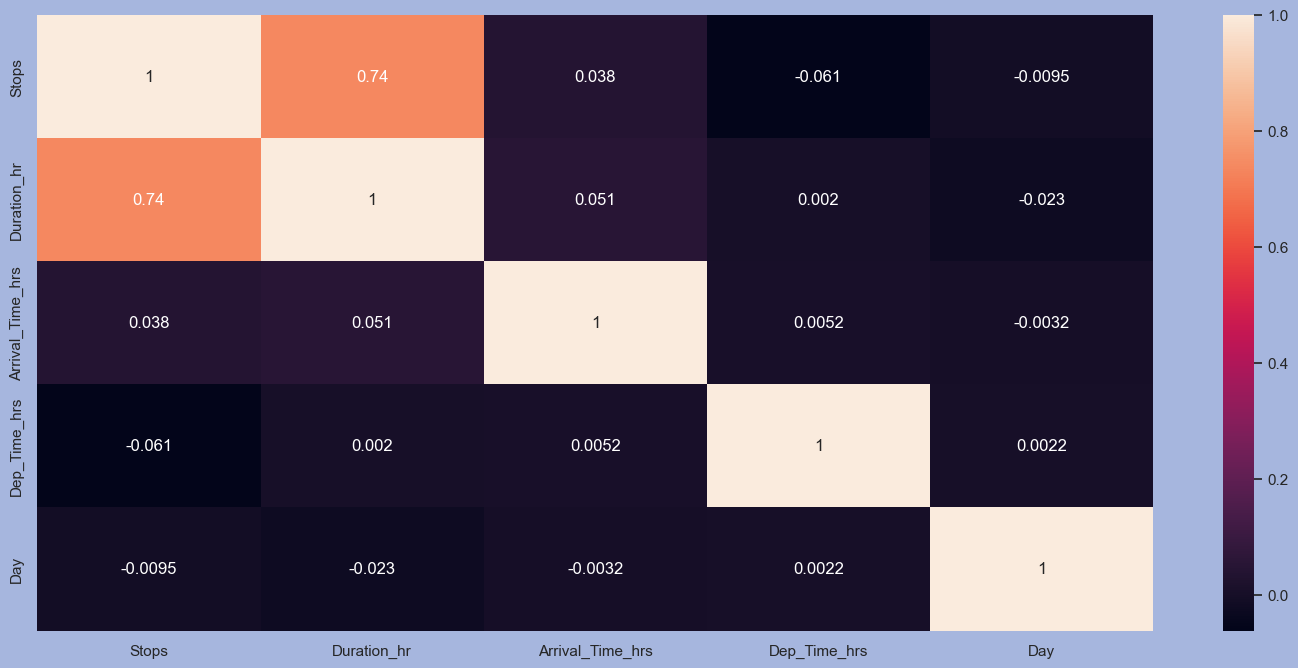

In [50]:
plt.figure(figsize=(18,8))
sns.heatmap(df_eda[numerical_cols].corr(),annot=True)

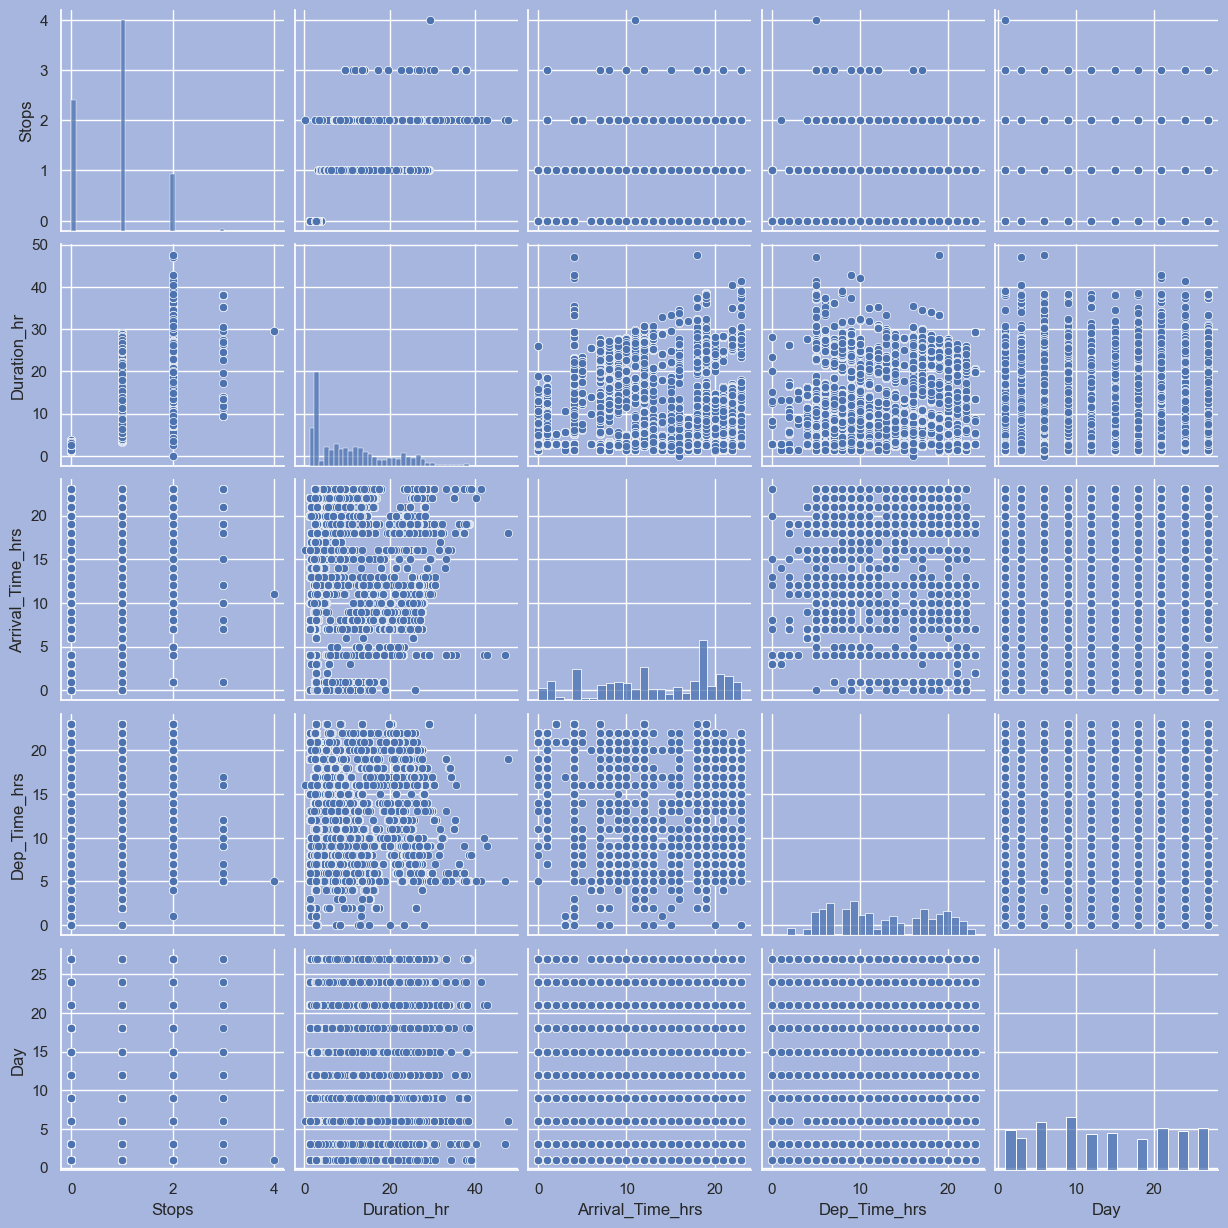

In [51]:
sns.pairplot(df_eda[numerical_cols])